In [ ]:
!pip install xlrd

In [3]:
!pip install openpyxl

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

In [7]:
df_ = pd.read_csv('online_retail.csv') 
df = df_.copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [10]:
df["StockCode"].nunique()

5305

In [11]:
df["StockCode"].value_counts().head()

StockCode
85123A    5829
22423     4424
85099B    4216
21212     3318
20725     3259
Name: count, dtype: int64

In [12]:
df.groupby("StockCode").agg({"Quantity": "sum"}).sort_values("Quantity", ascending=False).head

<bound method NDFrame.head of            Quantity
StockCode          
84077        108545
85123A        96066
85099B        95739
21212         95450
84879         80705
...             ...
10120         -8350
23003         -8516
23005        -14418
22126        -16400
20852        -18800

[5305 rows x 1 columns]>

In [13]:
df["Invoice"].nunique()

53628

In [14]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [16]:
df=df[~df["Invoice"].str.contains("C", na=False)]

In [17]:
df= df[(df["Quantity"]>0)]

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,805620.0,13.307665,144.306739,1.0,2.00,5.00,12.00,80995.0
Price,805620.0,3.206279,29.197901,0.0,1.25,1.95,3.75,10953.5
Customer ID,805620.0,15331.856250,1696.768395,12346.0,13982.00,15271.00,16805.00,18287.0


In [19]:
df["TotalPrice"]=df["Quantity"]*df["Price"]

In [20]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,TotalPrice
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [21]:
df["InvoiceDate"].max()

'2011-12-09 12:50:00'

In [22]:
today_date = dt.datetime(2011, 12, 11)

In [24]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [25]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda date: (today_date - date.max()).days, 
    'Invoice': lambda num: num.nunique(),  
    'TotalPrice': lambda TotalPrice: TotalPrice.sum()  
})

In [26]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [27]:
rfm = rfm[(rfm["Monetary"]) > 0 & (rfm["Frequency"] > 0)]

In [28]:
rfm

,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,3,8,5633.32
12348.0,76,5,2019.40
12349.0,19,4,4428.69
12350.0,311,1,334.40
...,...,...,...
18283.0,4,22,2736.65
18284.0,432,1,461.68
18285.0,661,1,427.00


In [30]:
rfm["RecencyScore"] = pd.qcut(rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])

In [31]:
rfm["FrequencyScore"] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

In [32]:
rfm["MonetaryScore"] = pd.qcut(rfm['Monetary'], 5, labels=[1, 2, 3, 4, 5])

In [33]:
rfm["RFM_SCORE"] = (rfm['RecencyScore'].astype(str) +
                    rfm['FrequencyScore'].astype(str) +
                    rfm['MonetaryScore'].astype(str))

In [34]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE
Customer ID,,,,,,,
12346.0,326,12,77556.46,2,5,5,255
12347.0,3,8,5633.32,5,4,5,545
12348.0,76,5,2019.40,3,4,4,344
12349.0,19,4,4428.69,5,3,5,535
12350.0,311,1,334.40,2,1,2,212
...,...,...,...,...,...,...,...
18283.0,4,22,2736.65,5,5,4,554
18284.0,432,1,461.68,1,2,2,122
18285.0,661,1,427.00,1,2,2,122


In [35]:
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At_Risk',
    r'[1-2]5': 'Cant_Loose',
    r'3[1-2]': 'About_to_Sleep',
    r'33': 'Need_Attention',
    r'[3-4][4-5]': 'Loyal_Customers',
    r'41': 'Promising',
    r'51': 'New_Customers',
    r'[4-5][2-3]': 'Potential_Loyalists',
    r'5[4-5]': 'Champions'
}

In [36]:
rfm['Segment'] = rfm['RecencyScore'].astype(str) + rfm['FrequencyScore'].astype(str)

In [37]:
rfm['Segment'] = rfm['Segment'].replace(seg_map, regex=True)

In [38]:
rfm

,Recency,Frequency,Monetary,RecencyScore,FrequencyScore,MonetaryScore,RFM_SCORE,Segment
Customer ID,,,,,,,,
12346.0,326,12,77556.46,2,5,5,255,Cant_Loose
12347.0,3,8,5633.32,5,4,5,545,Champions
12348.0,76,5,2019.40,3,4,4,344,Loyal_Customers
12349.0,19,4,4428.69,5,3,5,535,Potential_Loyalists
12350.0,311,1,334.40,2,1,2,212,Hibernating
...,...,...,...,...,...,...,...,...
18283.0,4,22,2736.65,5,5,4,554,Champions
18284.0,432,1,461.68,1,2,2,122,Hibernating
18285.0,661,1,427.00,1,2,2,122,Hibernating


In [39]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count"])

Recency        Frequency            Monetary      
                           mean count       mean count          mean count
Segment                                                                   
About_to_Sleep       107.618557   388   1.360825   388    531.969905   388
At_Risk              373.942667   750   3.904000   750   1383.596253   750
Cant_Loose           331.802817    71  15.929577    71   8355.677634    71
Champions              9.250000   852  19.217136   852  10795.520581   852
Hibernating          460.012484  1522   1.252300  1522    437.963135  1522
Loyal_Customers       68.306016  1147   9.803836  1147   4199.728592  1147
Need_Attention       114.241636   269   3.156134   269   1283.114015   269
New_Customers         11.303571    56   1.000000    56    356.257857    56
Potential_Loyalists   26.297335   713   2.589060   713   1155.427281   713
Promising             39.281818   110   1.000000   110    324.497000   110

In [40]:
rfm[["Segment", "Recency", "Frequency", "Monetary"]].groupby("Segment").agg(["mean", "count",
                                                                             "min", "median", "max"])

Recency                         Frequency            \
                           mean count  min median  max       mean count min   
Segment                                                                       
About_to_Sleep       107.618557   388   60   94.0  190   1.360825   388   1   
At_Risk              373.942667   750  191  377.0  734   3.904000   750   2   
Cant_Loose           331.802817    71  193  326.0  577  15.929577    71   8   
Champions              9.250000   852    1    9.0   20  19.217136   852   4   
Hibernating          460.012484  1522  191  435.0  739   1.252300  1522   1   
Loyal_Customers       68.306016  1147   22   54.0  190   9.803836  1147   4   
Need_Attention       114.241636   269   60  107.0  190   3.156134   269   2   
New_Customers         11.303571    56    1   11.0   20   1.000000    56   1   
Potential_Loyalists   26.297335   713    1   24.0   59   2.589060   713   1   
Promising             39.281818   110   22   38.5   59   1.000000   110   1   

                                     Monetary                          \
                    median  max          mean count     min    median   
Segment                                                                 
About_to_Sleep         1.0    2    531.969905   388    6.20   370.175   
At_Risk                4.0    8   1383.596253   750   38.92   965.510   
Cant_Loose            11.0  155   8355.677634    71  628.32  3881.890   
Champions             11.5  398  10795.520581   852  357.00  4009.870   
Hibernating            1.0    2    437.963135  1522    2.95   285.205   
Loyal_Customers        8.0  107   4199.728592  1147   30.95  2602.320   
Need_Attention         3.0    4   1283.114015   269  120.90   977.170   
New_Customers          1.0    1    356.257857    56   43.20   262.680   
Potential_Loyalists    3.0    4   1155.427281   713   20.80   692.190   
Promising              1.0    1    324.497000   110   30.00   221.620   

                                
                           max  
Segment                         
About_to_Sleep         5416.32  
At_Risk               44534.30  
Cant_Loose            77556.46  
Champions            608821.65  
Hibernating           13916.34  
Loyal_Customers      144458.37  
Need_Attention        39916.50  
New_Customers          3861.00  
Potential_Loyalists  168472.50  
Promising              1635.66

In [58]:
#https://www.kaggle.com/code/onurakcakaya/rfm-analysis

Repeat Customer Statistics:
           Recency   Frequency       Monetary
mean     43.135568   13.815908    7010.941586
min       1.000000    4.000000      30.950000
max     190.000000  398.000000  608821.650000
median   26.000000    9.000000    3056.910000

Number of Repeat Customers: 1999


C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


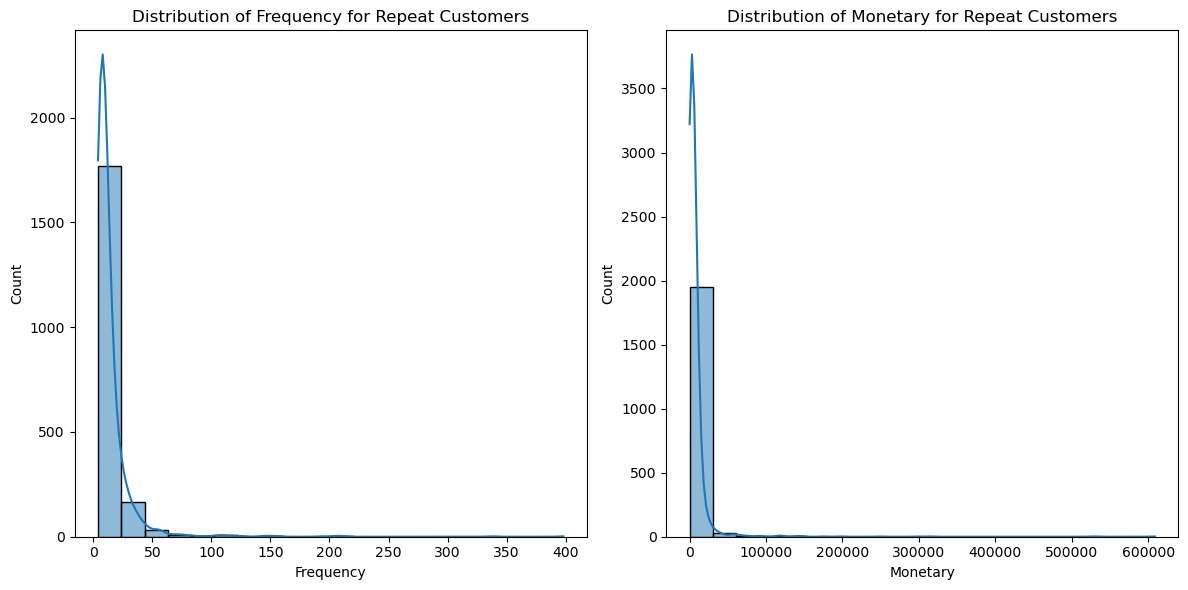

In [60]:
import pandas as pd

repeat_customers = rfm[rfm['Segment'].isin(['Loyal_Customers', 'Champions'])]

repeat_customers_stats = repeat_customers[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'min', 'max', 'median'])

print("Repeat Customer Statistics:")
print(repeat_customers_stats)

repeat_customers_count = repeat_customers.shape[0]
print(f"\nNumber of Repeat Customers: {repeat_customers_count}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(repeat_customers['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency for Repeat Customers')

plt.subplot(1, 2, 2)
sns.histplot(repeat_customers['Monetary'], bins=20, kde=True)
plt.title('Distribution of Monetary for Repeat Customers')

plt.tight_layout()
plt.show()


Churn Customer Statistics:
           Recency  Frequency      Monetary
mean    431.600352   2.127641    750.121955
min     191.000000   1.000000      2.950000
max     739.000000   8.000000  44534.300000
median  414.000000   1.000000    399.460000

Number of Churn Customers: 2272


C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\turtl\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


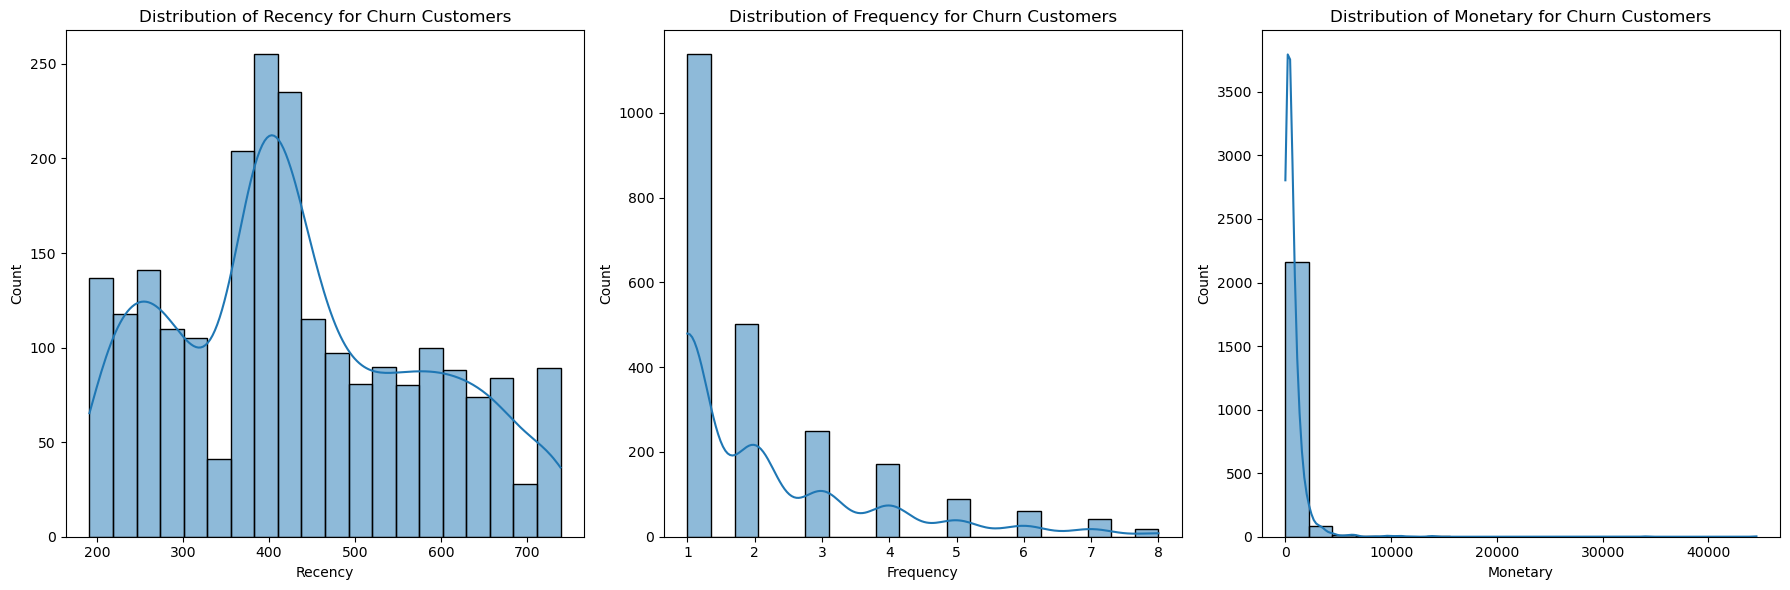

In [62]:
churn_customers = rfm[rfm['Segment'].isin(['Hibernating', 'At_Risk'])]

churn_customers_stats = churn_customers[['Recency', 'Frequency', 'Monetary']].agg(['mean', 'min', 'max', 'median'])

print("Churn Customer Statistics:")
print(churn_customers_stats)

churn_customers_count = churn_customers.shape[0]
print(f"\nNumber of Churn Customers: {churn_customers_count}")

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(churn_customers['Recency'], bins=20, kde=True)
plt.title('Distribution of Recency for Churn Customers')

plt.subplot(1, 3, 2)
sns.histplot(churn_customers['Frequency'], bins=20, kde=True)
plt.title('Distribution of Frequency for Churn Customers')

plt.subplot(1, 3, 3)
sns.histplot(churn_customers['Monetary'], bins=20, kde=True)
plt.title('Distribution of Monetary for Churn Customers')

plt.tight_layout()
plt.show()
